# K-Means

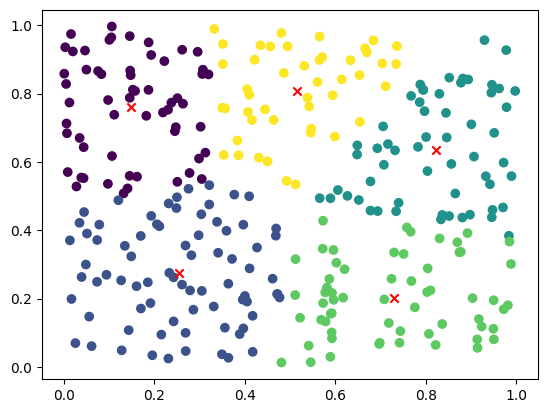

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# 데이터 생성
X = np.random.rand(300, 2)

kmeans=KMeans(
    n_clusters=5,       # 클러스터 개수(default = 8)
    init='k-means++',   # 초기 중심점 설정 방식
    max_iter=200,        # 최대 반복 횟수
    random_state=0)

# 학습
kmeans.fit(X)

# 예측
labels=kmeans.predict(X)

# 클러스터 예측 결과에 따라 색상을 다르게 표시
plt.scatter(X[:, 0], X[:, 1], c=labels)

# 클러스터링 중심점 표시
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red',marker='x')
plt.show()


# GMM

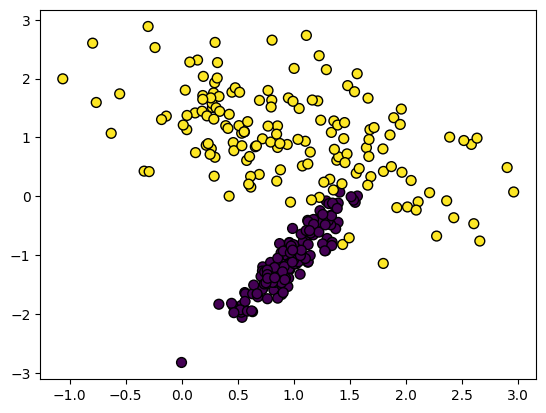

In [43]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

# 데이터 생성
X, _ = make_classification(
    n_samples=300,          # 데이터 개수
    n_features=2,           # 특성 개수
    n_informative=2,        # 유의미한 특성 개수
    n_redundant=0,          # 중복 특성 개수
    n_clusters_per_class=1, # 클래스 당 클러스터 수
    n_classes=2,            # 클래스(레이블) 개수
    random_state=42
)

# GMM 군집화 적용
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

labels=gmm.predict(X)

# 생성 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels, marker='o', edgecolors='k')
plt.show()

# DBSCAN

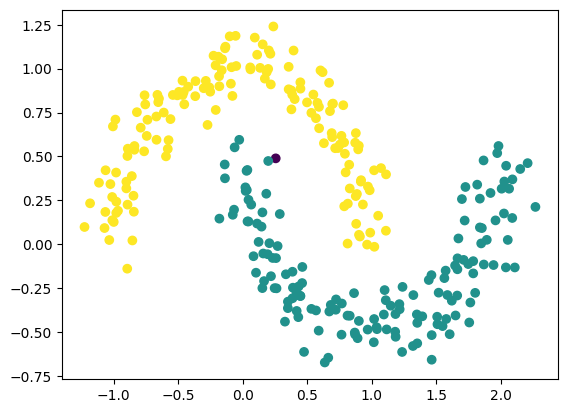

In [44]:
# 반달형 데이터포인트 생성
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=6)  # eps(이웃 정의 거리 반지름, 0.5)
                                # min_samples(minPts, 5)

dbscan.fit(X)   # 클러스터링 계산
# print(dbscan.labels_)

# 데이터포인트 산점도
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

# Silhouette Analysis

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# KMeans 군집화
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3, 
    init='k-means++', 
    max_iter=100, 
    random_state=0)

kmeans.fit(iris.data)   # 입력 데이터를 통해 중심점 계산
iris_df['cluster'] = kmeans.labels_

# 실루엣 계수 측정
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(iris.data, kmeans.labels_)
# sil_samples.shape
iris_df['sil_score'] = sil_samples

# 실루엣 계수 출력
sil_score = silhouette_score(iris.data, kmeans.labels_)
sil_score, iris_df['sil_score'].mean()

(np.float64(0.551191604619592), np.float64(0.551191604619592))

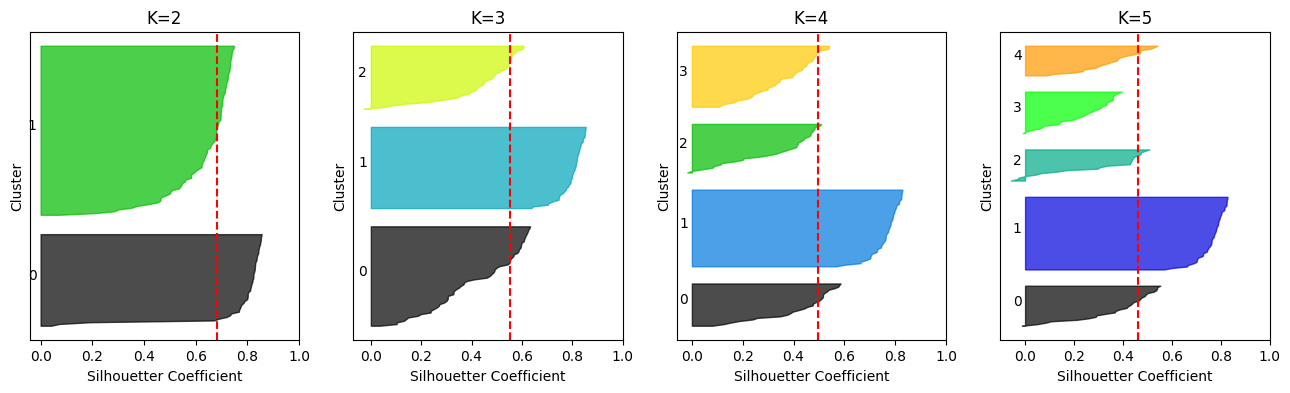

In [46]:
# k값(클러스터 개수)별 실루엣 계수 시각화
def visualize_silhouette(n_clusters, X):
    """
    :param n_clusters: [2, 3, 4, 5] 테스트할 k값 목록 
    :param X: 입력데이터
    :return: 
    """
    import matplotlib.cm as cm
    
    # k개수
    n_cols = len(n_clusters)
    # subplot 생성
    fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols, 4))
    
    for index, k in enumerate(n_clusters):
        # 군집 
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(X) # 중심점 계산 및 클러스터 결과 반환
        # 실루엣 계수
        sil_samples = silhouette_samples(X, labels)
        sil_score = silhouette_score(X, labels)
        
        # y축 범위
        y_lower = 10
        
        # plot 그리기
        for i in range(k): # range(2) = 0, 1  range(3) = 0, 1, 2
            ith_cluster_sil_samples = sil_samples[labels == i] # 이번 클러스터에 실루엣 계수 필터링
            ith_cluster_sil_samples.sort() # inplace 연산
            
            # 크기(영역) 계산
            ith_size = ith_cluster_sil_samples.shape[0]
            y_upper = y_lower + ith_size
            
            # 색상 지정
            color = cm.nipy_spectral(float(i) / k) # 클러스터 별 고유한 색상
            # print(color) # (r, g, b, a)
            axs[index].fill_betweenx(
                np.arange(y_lower, y_upper),    # y축 범위
                0,                              # x축1
                ith_cluster_sil_samples,        # x축2
                facecolor=color,                # 색상
                edgecolor=color,                # 테두리 색상
                alpha=0.7                       # 투명도
            )
            # 텍스트 추가
            axs[index].text(-0.05, y_lower + 0.5 * ith_size, str(i))

            y_lower = y_upper + 10 # 다음 차례의 아래경계 계산
        
        # 전체 실루엣 계수
        axs[index].axvline(x=sil_score, color='red', linestyle='--')
        
        # x, y축 라벨
        axs[index].set_xlabel('Silhouetter Coefficient')
        axs[index].set_ylabel('Cluster')
        
        # axis별 제목
        axs[index].set_title(f'K={k}')
        
        # x, y tick조정
        axs[index].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[index].set_yticks([])

visualize_silhouette([2, 3, 4, 5], iris.data)   